# FIT5196 Assessment 2 Task 3
#### Student Name: Vipul Krishnan Muralee Dharan
#### Student ID: 28104641

Date: 11/05/2018

Version: 1.0

Environment: Python 3.6.1 and Anaconda 4.3.21 (64-bit)

Libraries used:
* pandas v0.20.1 (for dataframe operations)
* sklearn v0.18.1 (for linear regression)


## 1. Introduction
In this task, we are required to find impute all the missing values by inspecting and analyzing the dataset3(dataset3_with_missing.csv). In the end, save the fixed table in dataset3_solution.csv.

## 2. Installing and Importing Libraries

We use sklearn library for making linenar regression model and predicting missing values (Scikit-Learn, 2018)

In [1]:
!pip install sklearn

You are using pip version 9.0.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 3. Loading and Examining Data
The first step is to load the data from the CSV file.

In [3]:
# loading the data as pandas dataframe
df1 = pd.read_csv("dataset3_with_missing.csv")

# checking first 5 rows to see the structure of the data
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


## 4. Cheking for Missing Values 

Now we check for missing values in the data

In [4]:
# counting the missing values
df1.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

As shown, there are 400 missing values in bathrooms values andd around 60 each in sqft_living, sqft_above and sqft_basement

## 5. Imputing the Missing Values 

Before starting the process, we generate a dataframe without any missing values from the current dataframe.

In [5]:
# taking portions without missing values
df2 = df1[df1.isnull().sum(axis = 1) < 1]

### Imputing sqft columns

The names of the column suggests that the sqft_above is the area of the house on floors above earth and sqft_basement is the basement area. S0 sqft_living should be equal to sqft_above + sqft_basement. We confirm this below.

In [6]:
# checking for the assumption
df2[df2.apply(lambda x: x.sqft_living != x.sqft_above + x.sqft_basement, axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


So our assumption is correct. Now we check if there is any row whith two of these values missing.

In [7]:
# checking for the assumption
df1[df1.apply(lambda x: ((pd.isnull(x.sqft_living)) & (pd.isnull(x.sqft_above))) | ((pd.isnull(x.sqft_living)) & (pd.isnull(x.sqft_basement))) | ((pd.isnull(x.sqft_above)) & (pd.isnull(x.sqft_basement))), axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


So only one values is missing at a time. So we can easily calculate them from the other values as below.

In [8]:
# imputing sqft_living
df1.loc[:,'sqft_living'] = df1.apply(lambda x: (x.sqft_above + x.sqft_basement) if pd.isnull(x.sqft_living) else x.sqft_living, axis = 1)

In [9]:
# imputing sqft_above
df1.loc[:,'sqft_above'] = df1.apply(lambda x: (x.sqft_living - x.sqft_basement) if pd.isnull(x.sqft_above) else x.sqft_above, axis = 1)

In [10]:
# imputing sqft_basement
df1.loc[:,'sqft_basement'] = df1.apply(lambda x: (x.sqft_living - x.sqft_above) if pd.isnull(x.sqft_basement) else x.sqft_basement, axis = 1)

In [11]:
df1.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

### Imputing bathrooms

First we analyse which all values effects the number of bathroom. We plot a pair plot for this.

In [12]:
# re-creating df2 as we added some more missing less rows, to make it more accurate
df2 = df1[df1.isnull().sum(axis = 1) < 1]

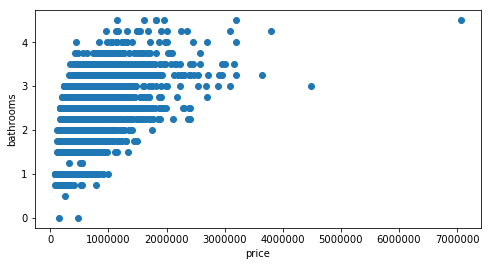

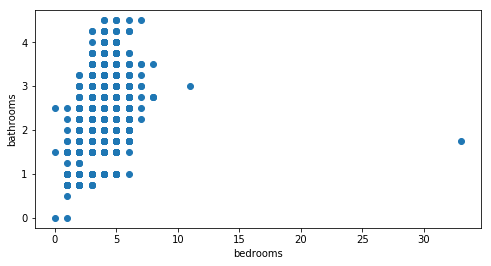

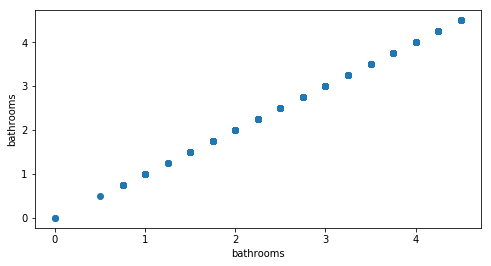

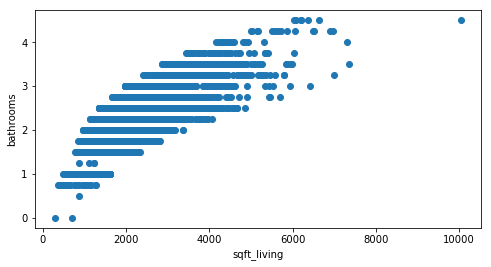

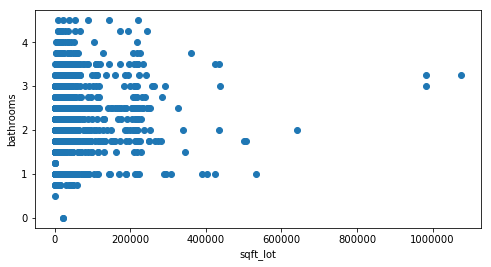

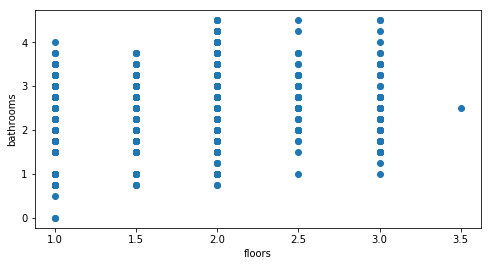

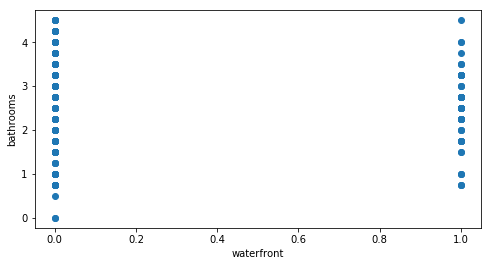

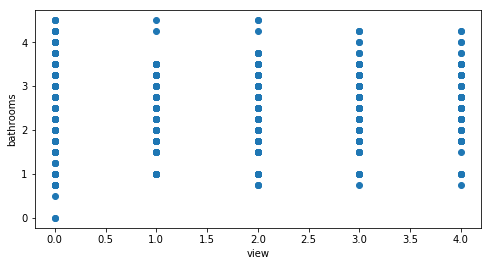

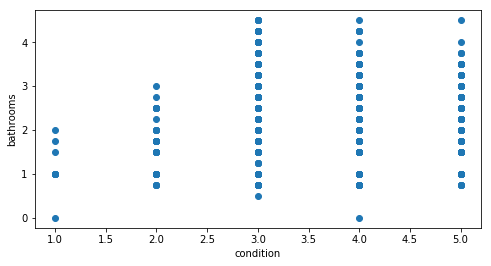

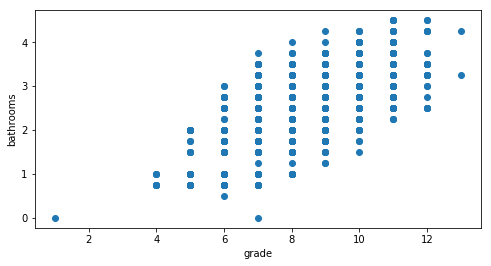

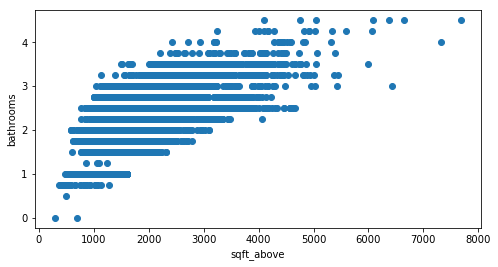

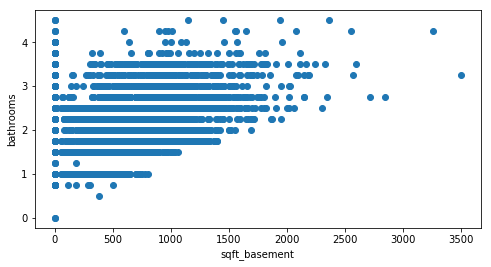

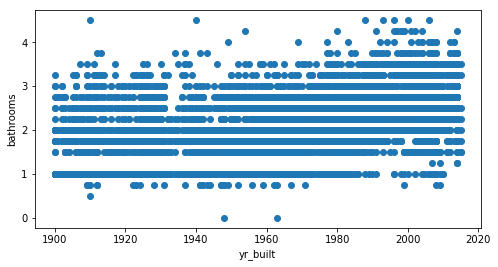

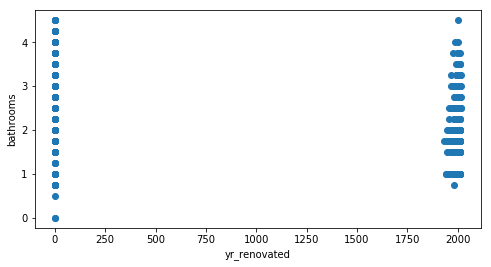

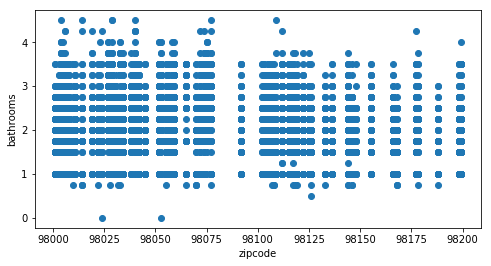

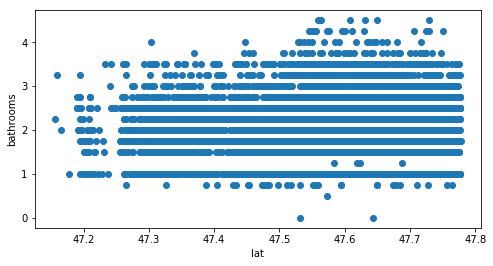

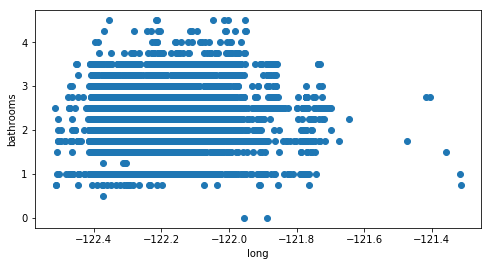

In [13]:
for c in df2.columns[2:]:
    plt.figure(figsize=(8,4))
    plt.plot(df1[c], df1.bathrooms, 'o')
    plt.xlabel(c)
    plt.ylabel("bathrooms")

We can see a significant correlation with 'bedrooms', 'sqft_living', 'grade'. So we use these field to create a model for bathroom and using that model, we impute the values. We first create the model and fit it with df2.

In [14]:
#instatiate
impute = LinearRegression()

In [15]:
# fitting regression
impute.fit(df2[['bedrooms', 'sqft_living', 'grade']],df2['bathrooms']) #fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The bath rooms values are in the multiples of .25. So we have to make a function convert the predicted value to this form.

In [16]:
# function to round the bathroom count to a valid value
def roundit(a):
    # if reminder is less than .125
    if a%.25 < .125:
        # give up the remainder
        return a - (a% .25)
    # else round it to .25
    else:
        return a + (.25 - (a%.25))

Now we predict the values and impute in the dataframe.

In [17]:
# predicting and imputing the values
df1.loc[:,'bathrooms'] = df1.apply(lambda x: roundit(impute.predict(x[['bedrooms', 'sqft_living', 'grade']].values.reshape(1, -1))) if pd.isnull(x.bathrooms) else x.bathrooms, axis = 1)

In [18]:
# checking 
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

So we have covered all missing values.

## 5. Storing the Data 

Now we have the corrected dataset. We store it in the file as mentioned in the question

In [19]:
df1.to_csv("dataset3_solution.csv", encoding = 'utf-8', index=False)

## 6. Summary
There were missing values in 3 columns.

As the sqft value columns were related each other with an equation, we imputed the missing values in sqft_living, sqft_above and sqft_basement easily using that formula.

For the bathrooms column we used linear regression to predict the missing values and imputed them.

## References

- Scikit-Learn. (2018). 'LinearRegression Documentation'. Retrieved from http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    